# Density Module (Correlation Functions)
The density module is intended to compute a variety of quantities associated with particle distributions with respect to other particles. The correlation functions 

In [85]:
import numpy as np
import freud
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle

First, let's generate an ordered 2D structure

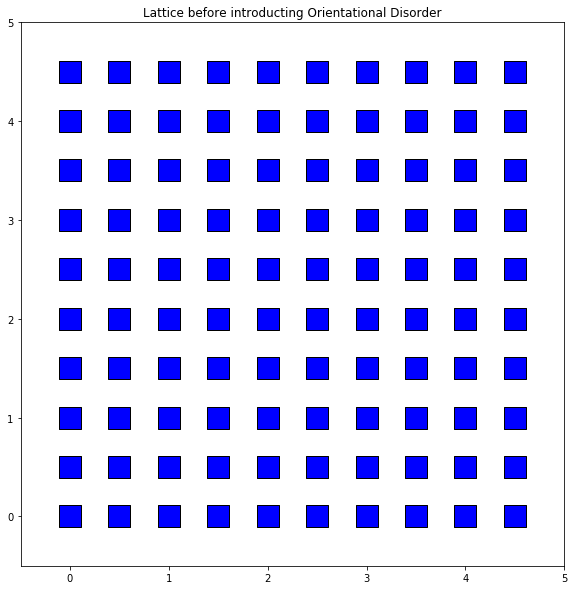

In [168]:
size=5
dx=0.5
points=np.array([[i,j,0] for j in np.arange(0,size,dx) for i in np.arange(0,size,dx)])
plt.figure(figsize=(10,10))
plt.scatter(points[:,0],
            points[:,1], 
            marker=(4,0,45), 
            edgecolor='k',
            facecolor='b',
            s=1000
           )

plt.title('Lattice before introducting Orientational Disorder')
plt.gca().set_aspect('equal')
plt.gca().set_xlim([-dx,size])
plt.gca().set_ylim([-dx,size])
plt.show()

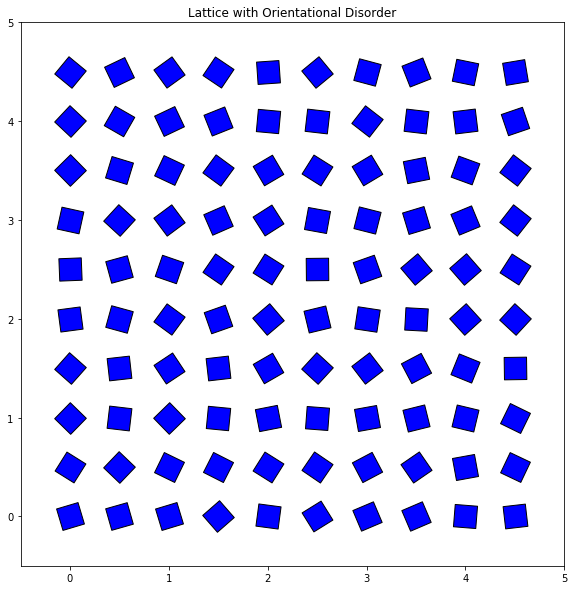

In [176]:
size=5
dx=0.5
angles=np.random.uniform(-45,45,size=len(points))
values=[np.exp(np.complex(0,1)*a*2*np.pi/180.) for a in angles]

plt.figure(figsize=(10,10))

for p,a in zip(points, angles):
    plt.scatter(p[0],
                p[1], 
                marker=(4,0,a+45), 
                edgecolor='k',
                facecolor='b',
                s=1000)

plt.title('Lattice with Orientational Disorder')
plt.gca().set_aspect('equal')
plt.gca().set_xlim([-dx,size])
plt.gca().set_ylim([-dx,size])
plt.show()

Now we create a box and a density compute object.

In [177]:
box = freud.box.Box.square(L=size)
fcf = freud.density.FloatCF(rmax=2., dr=0.05)
fcf.resetCorrelationFunction()

/Users/rosecers/Library/Python/3.6/lib/python/site-packages/numpy/core/numeric.py:710: ComplexWarning: Casting complex values to real discards the imaginary part
  arr = array(a, dtype=dtype, order=order, copy=False, subok=subok)


[0.47675229 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.37975647 0.
 0.         0.         0.36518095 0.         0.         0.
 0.         0.         0.37488956 0.         0.37806512 0.
 0.         0.         0.         0.         0.3773576  0.37889486
 0.35484741 0.37328069 0.         0.         0.         0.
 0.38023638 0.         0.         0.39030184]


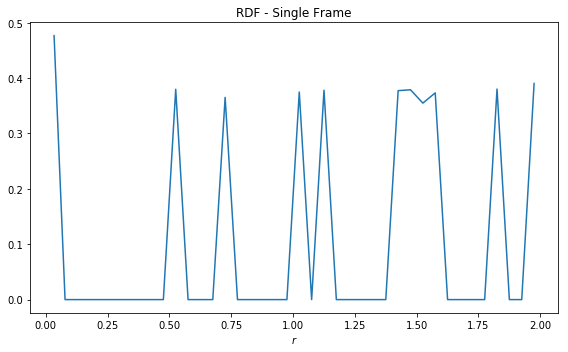

In [181]:
fcf.compute(box, points, values, points, values)
# get the center of the histogram bins
r = fcf.getR()
# get the value of the histogram bins
y = fcf.getRDF()
# y = fcf.getCounts()
print(y)

plt.figure(figsize=(8, 5))
plt.title("RDF - Single Frame")
plt.plot(r, y)
plt.xlabel(r"$r$")
# plt.ylabel(r"$\theta_1*\theta_2$")
plt.tight_layout()
plt.show()

In [179]:
box = freud.box.Box.square(L=size)
ccf = freud.density.ComplexCF(rmax=2., dr=0.05)
ccf.resetCorrelationFunction()

[-0.04649543+0.04995825j  0.        +0.j          0.        +0.j
  0.        +0.j          0.        +0.j          0.        +0.j
  0.        +0.j          0.        +0.j          0.        +0.j
  0.        +0.j          0.36832644+0.01846171j  0.        +0.j
  0.        +0.j          0.        +0.j          0.40383641+0.0177365j
  0.        +0.j          0.        +0.j          0.        +0.j
  0.        +0.j          0.        +0.j          0.38958267+0.03373034j
  0.        +0.j          0.34338393+0.0066116j   0.        +0.j
  0.        +0.j          0.        +0.j          0.        +0.j
  0.        +0.j          0.44038297+0.01239634j  0.39768716-0.00705776j
  0.37663922+0.02809412j  0.36168767+0.01616676j  0.        +0.j
  0.        +0.j          0.        +0.j          0.        +0.j
  0.44270056-0.0002724j   0.        +0.j          0.        +0.j
  0.32921823+0.04242417j]


/Users/rosecers/Library/Python/3.6/lib/python/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


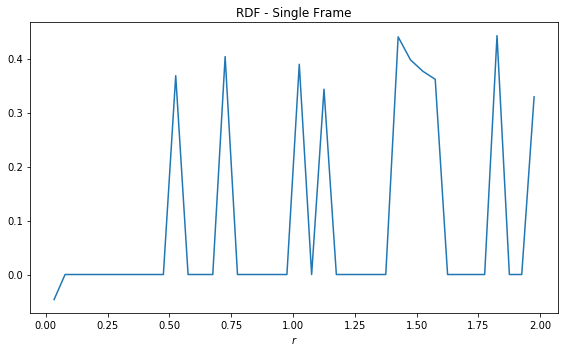

In [182]:
ccf.compute(box, points, values, points, values)
# get the center of the histogram bins
r = ccf.getR()
# get the value of the histogram bins
y = ccf.getRDF()
# y = ccf.getCounts()
print(y)

plt.figure(figsize=(8, 5))
plt.title("RDF - Single Frame")
plt.plot(r, y)
plt.xlabel(r"$r$")
# plt.ylabel(r"$\theta_1*\theta_2$")
plt.tight_layout()
plt.show()